In [144]:
import os
import json
import cv2
import librosa
import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from warnings import filterwarnings

filterwarnings(action='ignore')

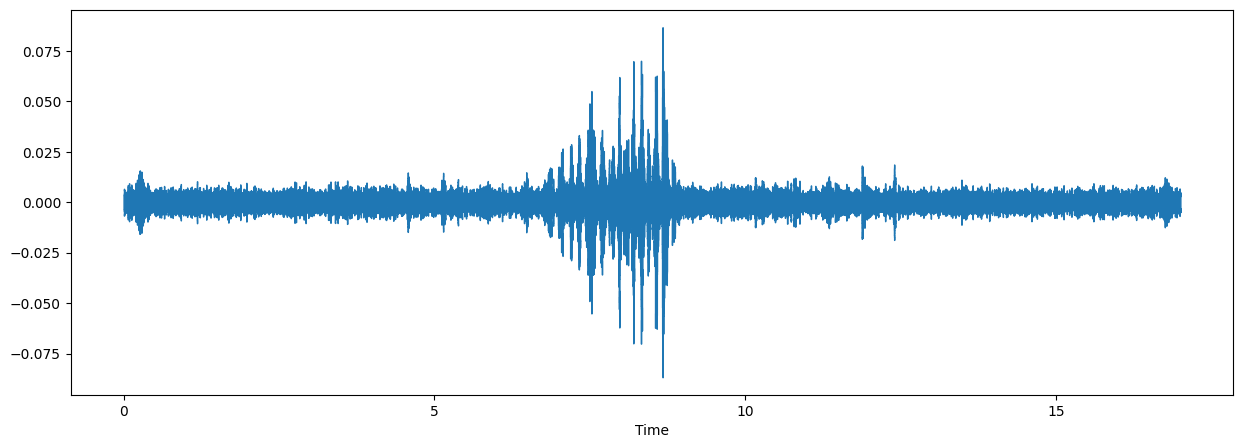

In [145]:
# Sample Audio Checking

# Set Plot Size
plt.figure(figsize=(15,5))

# Load Audio File to extract Audio Data and Sample Rate
audio_data, sample_rate = librosa.load(path='Dataset/aldfly/XC133197.mp3')
librosa.display.waveshow(y=audio_data, sr=sample_rate)

# View and Hear Audio File
IPython.display.Audio(data='Dataset/aldfly/XC133197.mp3')
     


In [146]:

# Audio will be automatically converted to Mono Channel [1-Dimentional Signal] Data
audio_data

array([ 3.7594000e-04,  5.9281563e-04,  6.4088637e-04, ...,
       -2.1653352e-03, -1.7114603e-03, -1.8151535e-05], dtype=float32)

In [147]:
# Audio will be automatically resampled to the rate of 22050Hz (default sr=22050)
sample_rate
     

22050

In [148]:
# Sample Audio Checking
mfccs_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)

In [149]:
mfccs_features, mfccs_features.shape

(array([[-4.7928848e+02, -4.4791196e+02, -4.4674863e+02, ...,
         -4.3189218e+02, -4.3952304e+02, -4.7098935e+02],
        [ 7.8245193e+01,  7.2238297e+01,  6.8375107e+01, ...,
          7.6080101e+01,  7.2538712e+01,  6.9031036e+01],
        [ 3.1214146e+01,  2.4540554e+01,  2.1226994e+01, ...,
          1.7377094e+01,  2.0968449e+01,  2.0912155e+01],
        ...,
        [ 4.8865776e+00,  2.0764546e+00, -1.2713640e+00, ...,
         -1.0237126e+00,  3.0066540e+00,  5.6409168e+00],
        [ 4.3823719e-03, -1.2974553e+00, -6.6289253e+00, ...,
         -5.9586978e+00,  2.9269230e-01,  3.8591805e+00],
        [ 2.4524143e+00,  4.2282648e+00,  2.9792008e+00, ...,
         -3.2243176e+00, -1.9398575e+00,  2.6605732e+00]], dtype=float32),
 (40, 733))

In [150]:
# Sample Audio Checking
np.mean(mfccs_features, axis=1)     # axis=1 means row wise mean calculation - shape=(40,0)  &  axis=0 means column wise mean caculation - shape=(673,)
     


array([-4.3604761e+02,  6.1142910e+01,  2.2094358e+01,  1.9550707e+01,
        8.2356424e+00,  1.2453636e+01,  4.6193800e+00,  1.1717030e+01,
       -1.5418789e+00,  1.3396179e+01, -2.5436871e+00,  9.1891975e+00,
       -2.2995490e-01,  7.0941844e+00, -8.7936711e-01,  6.6106658e+00,
       -8.2367671e-01,  6.2950244e+00, -2.2878449e+00,  6.0429568e+00,
       -1.8969501e+00,  5.4517808e+00, -7.3587447e-01,  3.7199738e+00,
        3.6787605e-01,  3.7640748e+00,  7.8993815e-01,  2.9071860e+00,
        3.0769530e-01,  3.1547816e+00, -1.1929479e+00,  3.5040808e+00,
       -1.2164612e+00,  2.9689569e+00, -8.6979377e-01,  1.7265463e+00,
       -5.4162824e-01,  2.2432439e+00,  1.7828682e-02,  1.8158647e+00],
      dtype=float32)

In [151]:
np.mean(mfccs_features, axis=1).shape
     

(40,)

In [152]:
# Convert the mp3 Audio into Tensors

def audio_to_tensors(audio_file):
    # Extract the Signal and Sample_Rate from Audio
    audio, sample_rate =librosa.load(audio_file)

    # Extract the MFCC Features and Aggrigate
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features = np.mean(mfccs_features, axis=1)

    # Convert into Tensors
    mfccs_tensors = tf.convert_to_tensor(mfccs_features, dtype=tf.float32)

    return mfccs_tensors

In [153]:
# Sample Audio
audio_sample = 'Dataset/aldfly/XC133197.mp3'
audio_to_tensors(audio_sample)

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([-4.3604761e+02,  6.1142910e+01,  2.2094358e+01,  1.9550707e+01,
        8.2356424e+00,  1.2453636e+01,  4.6193800e+00,  1.1717030e+01,
       -1.5418789e+00,  1.3396179e+01, -2.5436871e+00,  9.1891975e+00,
       -2.2995490e-01,  7.0941844e+00, -8.7936711e-01,  6.6106658e+00,
       -8.2367671e-01,  6.2950244e+00, -2.2878449e+00,  6.0429568e+00,
       -1.8969501e+00,  5.4517808e+00, -7.3587447e-01,  3.7199738e+00,
        3.6787605e-01,  3.7640748e+00,  7.8993815e-01,  2.9071860e+00,
        3.0769530e-01,  3.1547816e+00, -1.1929479e+00,  3.5040808e+00,
       -1.2164612e+00,  2.9689569e+00, -8.6979377e-01,  1.7265463e+00,
       -5.4162824e-01,  2.2432439e+00,  1.7828682e-02,  1.8158647e+00],
      dtype=float32)>

In [154]:
# Audio Directory Path
directory = 'Dataset'

extracted_features = []

# Count the total number of files
total_files = sum(len(files) for _, _, files in os.walk(directory))

# Initialize tqdm with the total number of files
with tqdm(total=total_files, desc='Processing files') as pbar:

  for target_class in os.listdir(directory):                               # List of All Target Folder Names in Directory

      # Skip .DS_Store file
      if target_class == ".DS_Store":
          continue

      target_class_path = os.path.join(directory, target_class)            # Make a Target Folder Path in Directory

      for audio_file in os.listdir(target_class_path):                     # List of All Audio Files in Target Folder

          # Skip .DS_Store file
          if audio_file == ".DS_Store":
              continue

          audio_path = os.path.join(directory, target_class, audio_file)   # Make a Audio File Path from Target Folder in Directory

          features = audio_to_tensors(audio_path)                          # Extract the Features from the Audio File

          extracted_features.append([features, target_class])              # Append the Features and Target_Class in List

          pbar.update(1)                                                   # Update the progress bar for each file processed


Processing files:  13%|██▉                   | 271/2073 [00:31<02:10, 13.82it/s]Note: Illegal Audio-MPEG-Header 0x0a000000 at offset 1156828.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Processing files:  18%|███▉                  | 368/2073 [00:42<02:56,  9.63it/s]Note: Illegal Audio-MPEG-Header 0x54004172 at offset 548279.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Processing files:  23%|████▉                 | 469/2073 [00:55<05:51,  4.56it/s]Note: Illegal Audio-MPEG-Header 0x64757320 at offset 1315234.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Processing files:  25%|█████▍                | 509/2073 [00:59<02:17, 11.35it/s]Warning: Xing stream size off by more than 1%, fuzzy seeking may be even more fuzzy than by design!
Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 695205.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Processing files:  28%|██████▏    

In [155]:
extracted_features[0]

[<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-1.9201837e+02,  1.3625644e+02, -4.5045311e+01,  3.7770039e+01,
        -4.6660427e+01,  1.5231340e+01, -1.0226228e+01, -6.5770917e+00,
        -1.4900059e+01,  4.3719463e+00, -2.0311707e+01,  3.2026958e+00,
        -1.6787909e+01, -1.0644232e+00, -1.3188051e+01, -4.0342822e+00,
        -7.9084735e+00, -2.6521368e+00, -2.3419476e+00, -5.8547802e+00,
        -1.6917083e+00, -3.1329007e+00, -3.7691708e+00, -8.6959541e-01,
        -3.1002269e+00, -8.6814696e-01, -2.1622736e+00,  3.8550649e-02,
        -4.4120789e+00, -1.1262522e+00, -2.6843224e+00, -8.5322934e-01,
        -1.9251757e+00, -2.6065573e-01, -1.0559114e+00, -2.4645519e-01,
        -1.7343011e+00, -1.6208622e-01, -2.1388941e+00, -7.6376700e-01],
       dtype=float32)>,
 'banswa']

In [156]:

# Creating DataFrame from Extracted Features with Class Labels

features_df = pd.DataFrame(extracted_features, columns=['features', 'class'])
features_df

,features,class
0,"(tf.Tensor(-192.01837, shape=(), dtype=float32...",banswa
1,"(tf.Tensor(-365.14133, shape=(), dtype=float32...",banswa
2,"(tf.Tensor(-362.54837, shape=(), dtype=float32...",banswa
3,"(tf.Tensor(-471.53967, shape=(), dtype=float32...",banswa
4,"(tf.Tensor(-373.41006, shape=(), dtype=float32...",banswa
...,...,...
2067,"(tf.Tensor(-504.01755, shape=(), dtype=float32...",amewig
2068,"(tf.Tensor(-303.04364, shape=(), dtype=float32...",amewig
2069,"(tf.Tensor(-198.0656, shape=(), dtype=float32)...",amewig
2070,"(tf.Tensor(-221.81534, shape=(), dtype=float32...",amewig


In [157]:
target_encoding = LabelEncoder().fit_transform(features_df['class'])
target_encoding

array([17, 17, 17, ...,  9,  9,  9])

In [158]:

# Adding Encoded Class Labels Column to DataFrame

features_df['target'] = target_encoding.tolist()
features_df

,features,class,target
0,"(tf.Tensor(-192.01837, shape=(), dtype=float32...",banswa,17
1,"(tf.Tensor(-365.14133, shape=(), dtype=float32...",banswa,17
2,"(tf.Tensor(-362.54837, shape=(), dtype=float32...",banswa,17
3,"(tf.Tensor(-471.53967, shape=(), dtype=float32...",banswa,17
4,"(tf.Tensor(-373.41006, shape=(), dtype=float32...",banswa,17
...,...,...,...
2067,"(tf.Tensor(-504.01755, shape=(), dtype=float32...",amewig,9
2068,"(tf.Tensor(-303.04364, shape=(), dtype=float32...",amewig,9
2069,"(tf.Tensor(-198.0656, shape=(), dtype=float32)...",amewig,9
2070,"(tf.Tensor(-221.81534, shape=(), dtype=float32...",amewig,9


In [159]:

# Creating a Dictionary based on Class and Target columns for Future Prediction

prediction_dict = features_df.set_index('target')['class'].to_dict()
prediction_dict

{17: 'banswa',
 12: 'annhum',
 8: 'amerob',
 7: 'amered',
 18: 'barswa',
 6: 'amepip',
 5: 'amekes',
 16: 'balori',
 19: 'bawwar',
 3: 'amecro',
 10: 'amewoo',
 14: 'baisan',
 1: 'ameavo',
 15: 'baleag',
 2: 'amebit',
 11: 'amtspa',
 0: 'aldfly',
 4: 'amegfi',
 13: 'astfly',
 9: 'amewig'}

In [160]:
# Save to JSON File

with open(file='content/prediction.json', mode='w') as f:
    json.dump(prediction_dict, f)

In [161]:


with open(file='content/prediction.json', mode='r') as f:
    prediction_dict = json.load(f)
prediction_dict

{'17': 'banswa',
 '12': 'annhum',
 '8': 'amerob',
 '7': 'amered',
 '18': 'barswa',
 '6': 'amepip',
 '5': 'amekes',
 '16': 'balori',
 '19': 'bawwar',
 '3': 'amecro',
 '10': 'amewoo',
 '14': 'baisan',
 '1': 'ameavo',
 '15': 'baleag',
 '2': 'amebit',
 '11': 'amtspa',
 '0': 'aldfly',
 '4': 'amegfi',
 '13': 'astfly',
 '9': 'amewig'}

In [162]:

# Converting Features into List
features = features_df['features'].tolist()
features

[<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-1.9201837e+02,  1.3625644e+02, -4.5045311e+01,  3.7770039e+01,
        -4.6660427e+01,  1.5231340e+01, -1.0226228e+01, -6.5770917e+00,
        -1.4900059e+01,  4.3719463e+00, -2.0311707e+01,  3.2026958e+00,
        -1.6787909e+01, -1.0644232e+00, -1.3188051e+01, -4.0342822e+00,
        -7.9084735e+00, -2.6521368e+00, -2.3419476e+00, -5.8547802e+00,
        -1.6917083e+00, -3.1329007e+00, -3.7691708e+00, -8.6959541e-01,
        -3.1002269e+00, -8.6814696e-01, -2.1622736e+00,  3.8550649e-02,
        -4.4120789e+00, -1.1262522e+00, -2.6843224e+00, -8.5322934e-01,
        -1.9251757e+00, -2.6065573e-01, -1.0559114e+00, -2.4645519e-01,
        -1.7343011e+00, -1.6208622e-01, -2.1388941e+00, -7.6376700e-01],
       dtype=float32)>,
 <tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-3.65141327e+02,  4.48325882e+01, -1.02284956e+01, -3.67663193e+00,
        -2.04053288e+01, -3.61039311e-01, -1.46613874e+01, -1.80288982e+01,
       

In [163]:
target = features_df['target'].tolist()
print(target)

[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 

In [164]:
	

# Converting Features and Targets to TensorFlow Tensors
features_tensor = tf.convert_to_tensor(features)
target_tensor = tf.convert_to_tensor(target)

In [165]:

features_tensor

<tf.Tensor: shape=(2072, 40), dtype=float32, numpy=
array([[-1.92018372e+02,  1.36256439e+02, -4.50453110e+01, ...,
        -1.62086219e-01, -2.13889408e+00, -7.63767004e-01],
       [-3.65141327e+02,  4.48325882e+01, -1.02284956e+01, ...,
         1.50551870e-01,  1.45018175e-01, -4.71625954e-01],
       [-3.62548370e+02,  3.84362946e+01, -8.68904877e+00, ...,
        -1.32240072e-01, -6.29190266e-01, -1.62414300e+00],
       ...,
       [-1.98065598e+02,  1.49315369e+02, -7.69852142e+01, ...,
        -1.34480286e+00, -3.73792839e+00, -1.02912211e+00],
       [-2.21815338e+02,  1.93339443e+01, -1.23447075e+02, ...,
         2.58010125e+00,  2.95663271e-02,  1.20706642e+00],
       [-2.03319916e+02,  3.09472961e+01, -1.25692642e+02, ...,
         2.16395497e+00, -6.77589178e-02,  1.44160300e-01]], dtype=float32)>

In [166]:
target_tensor

<tf.Tensor: shape=(2072,), dtype=int32, numpy=array([17, 17, 17, ...,  9,  9,  9], dtype=int32)>

In [167]:

# Creating TensorFlow Dataset from Tensors
dataset = tf.data.Dataset.from_tensor_slices((features_tensor, target_tensor))
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(40,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [168]:

# Split the dataset into batches
batch_size = 32
dataset = dataset.batch(batch_size)
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [169]:

# Length of Batched Potato Dataset
len(dataset)

65

In [170]:

# Define a Function process to Split Dataset into Training(80%), Validation(10%) and Testing(10%) Sets

def train_validation_test_split(dataset, train_size=0.8, validation_size=0.1, test_size=0.1, shuffle=True, shuffle_size=10000):

    dataset_batch_count = len(dataset)                                                  # Batch Images dataset Length is 68
    train_batch_count = int(dataset_batch_count * train_size)                           # int(68*0.8) ---> 54 Batches are Training
    validation_test_batch_count = int(dataset_batch_count * validation_size)            # int(68*0.1) ---> 6 Batches are validation & Remaining Testing

    if shuffle:
        dataset = dataset.shuffle(buffer_size=shuffle_size)                             # Suffling the Dataset help to Model Understand the Data Well

    train_ds = dataset.take(train_batch_count)                                          # First 54 Batches are Training_Dataset
    validation_ds = dataset.skip(train_batch_count).take(validation_test_batch_count)   # Remaining 14 Batches ---> Next 6 Batch are Validation_Dataset
    test_ds = dataset.skip(train_batch_count).skip(validation_test_batch_count)         # Pending 8 Batches are Testing

    return train_ds, validation_ds, test_ds
     

In [171]:

# Apply the Function in Potato Dataset
train_ds, validation_ds, test_ds = train_validation_test_split(dataset)
len(train_ds), len(validation_ds), len(test_ds)

(52, 6, 7)

(40,)
[-4.9023508e+02 -1.8822380e+01 -5.6613640e+01  6.1011108e+01
 -4.2107670e+01  5.0019765e+00 -3.9650772e+00 -1.6557989e+01
 -8.3150492e+00 -1.6425066e+01 -1.0326499e+01 -8.5783138e+00
 -2.3963213e+00 -3.2575672e+00 -2.6226606e+00 -6.2405372e-01
 -2.8136537e+00 -3.0124695e+00 -2.3721015e+00  2.3677881e+00
 -1.8523396e+00 -1.8013872e+00 -2.3927693e-01 -1.0988159e+00
 -1.6643243e+00 -5.0551909e-01 -1.0351957e+00  8.8488370e-01
 -6.9352269e-01 -1.6265079e+00 -5.8910549e-01 -6.2342143e-01
 -1.8433015e+00  2.0641905e-01 -1.6861950e-01  7.6953000e-01
 -3.2220191e-01  4.1491246e-01 -8.7112617e-01  5.3414106e-02]

(32,)
18



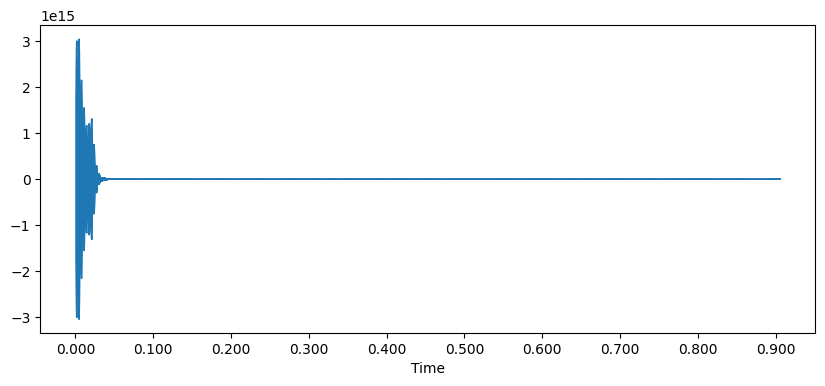

2024-08-29 11:56:44.862375: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [172]:
# Visualize the Image and Label Batches from TensorFlow Dataset

for audio_batch, label_batch in train_ds.take(1):
    print(audio_batch.numpy()[0].shape)
    print(audio_batch.numpy()[0])
    print()

    print(label_batch.numpy().shape)
    print(label_batch.numpy()[0])
    print()

    audio = librosa.feature.inverse.mfcc_to_audio(audio_batch.numpy())

    # Plot the reconstructed audio waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio)
    plt.show() 

In [173]:

# Overview of Training Dataset Structure and Specifications
train_ds
     

<_TakeDataset element_spec=(TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [174]:
# Building an Optimized Data Pipeline for Enhanced Performance

# Training Dataset
train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

# Validation Dataset
validation_ds = validation_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

# Testing Dataset
test_ds = test_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

In [175]:
# Define the Parameters of Input_shape, Channel and Target

mfcc_features = 40    # Extracted features from Audio
channel = 1           # Mono Channel
target = 20          # Output Classes

input_shape = (mfcc_features, channel)
input_shape
     

(40, 1)

In [176]:
model = keras.Sequential([

            # Input Layer
            keras.layers.Input(shape=input_shape),

            # 1st Conv Layer
            keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # 2nd Conv Layer
            keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # 3rd Conv Layer
            keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # Flatten and Convert into 1-Dimentional Vector
            keras.layers.Flatten(),

            # 1st Fully Connected Dense Layer
            keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=1e-2)),
            keras.layers.Dropout(rate=0.3),

            # 2nd Fully Connected Dense Layer
            keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=1e-2)),
            keras.layers.Dropout(rate=0.3),

            # Output Layer
            keras.layers.Dense(units=target, activation='softmax')
        ])

model

<Sequential name=sequential_3, built=True>

In [177]:
input_shape = (None, mfcc_features, channel)

model.build(input_shape)
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)               │ (None, 38, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 38, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 19, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 17, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 17, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 9, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 7, 256)         │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 7, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 4, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 20)             │        10,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,096,212 (4.18 MB)

 Trainable params: 1,094,932 (4.18 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [178]:
# Compiling the Model with Optimizer, Loss, and Metrics

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model

<Sequential name=sequential_3, built=True>

In [179]:

# Model Training with Training_Dataset and Evaluated with Validation_Dataset

history = model.fit(train_ds,
                    batch_size=batch_size,
                    epochs=700,
                    verbose=1,
                    validation_data = validation_ds)
history

Epoch 1/700
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0667 - loss: 15.6074 - val_accuracy: 0.6094 - val_loss: 14.4630
Epoch 2/700
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1243 - loss: 15.0937 - val_accuracy: 0.5833 - val_loss: 14.2781
Epoch 3/700
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1748 - loss: 14.8117 - val_accuracy: 0.5885 - val_loss: 14.0993
Epoch 4/700
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2226 - loss: 14.5532 - val_accuracy: 0.5781 - val_loss: 13.9633
Epoch 5/700
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2094 - loss: 14.5208 - val_accuracy: 0.5885 - val_loss: 13.7927
Epoch 6/700
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2626 - loss: 14.3078 - val_accuracy: 0.5781 - val_loss: 13.6618
Epoch 7/700
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2984 - loss: 14.1437 - val_accuracy: 0.5833 - val_loss: 13.5532
Epoch 8/700
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1949 - loss: 14.4918 - va

In [180]:

# Evaluating Model Performance on Test Dataset
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8288 - loss: 0.8664 


[0.9106351733207703, 0.8035714030265808]

In [181]:
# Accessing Training History Parameters
history.params

{'verbose': 1, 'epochs': 700, 'steps': 52}

In [182]:

# Accessing Keys of Training History
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [183]:

# Extracting Accuracy Metrics from Training History
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Extracting Loss Metrics from Training History
loss = history.history['loss']
val_loss = history.history['val_loss']

In [184]:
len(acc), len(val_acc), len(loss), len(val_loss)    

(700, 700, 700, 700)

In [185]:
# Save the Model
model.save('content/model.h5')

Text(0.5, 1.0, 'Training vs Validation Loss')

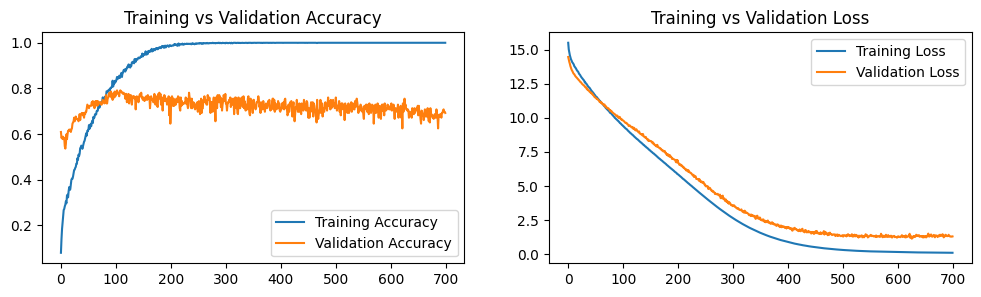

In [186]:
# Visualize the Acuuracy & Loss using Plots

plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

In [187]:
def prediction(audio_file):

    # Load the Prediction JSON File to Predict Target_Label
    with open('content/prediction.json', mode='r') as f:
        prediction_dict = json.load(f)

    # Extract the Audio_Signal and Sample_Rate from Input Audio
    audio, sample_rate =librosa.load(audio_file)

    # Extract the MFCC Features and Aggrigate
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features = np.mean(mfccs_features, axis=1)

    # Reshape MFCC features to match the expected input shape for Conv1D both batch & feature dimension
    mfccs_features = np.expand_dims(mfccs_features, axis=0)
    mfccs_features = np.expand_dims(mfccs_features, axis=2)

    # Convert into Tensors
    mfccs_tensors = tf.convert_to_tensor(mfccs_features, dtype=tf.float32)

    # Load the Model and Prediction
    model = tf.keras.models.load_model('content/model.h5')
    prediction = model.predict(mfccs_tensors)

    # Find the Maximum Probability Value
    target_label = np.argmax(prediction)

    # Find the Target_Label Name using Prediction_dict
    predicted_class = prediction_dict[str(target_label)]
    confidence = round(np.max(prediction)*100, 2)

    print(f'Predicted Class : {predicted_class}')
    print(f'Confident : {confidence}%')
     

In [191]:
prediction('content/XC544029.mp3')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted Class : ameavo
Confident : 33.8%
